# Parte 3 - Sección 13: Classificación con K-NN

In [1]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

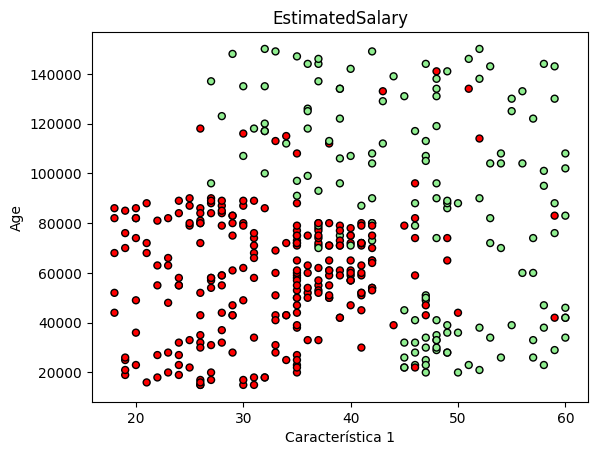

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['red', 'lightgreen'])

# Grafica los puntos, coloreando según los valores de y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=25)
plt.title("EstimatedSalary")
plt.xlabel("Característica 1")
plt.ylabel("Age")
plt.show()

In [4]:
# Separación de datos en entrenamiento y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [5]:
# Estandarización de datos para mejor precisción
# Además, es importante porque estamos usando distancias, por lo que, es muy importante
# que todas las variables independientes esten en la misma unidad
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2) # Distancia ecludiana
classifier.fit(X_train, y_train)
print('¡Modelo entrenado!')

¡Modelo entrenado!


In [7]:
# Predecir un valor, supongamos que una persona tiene 30 años y su sueldo estimado es de 87000
classifier.predict([[30, 87000]]) # Si compraria según el modelo

array([1])

In [8]:
y_pred = classifier.predict(X_test)
pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


In [9]:
# Revisar la precisión del modelo con una matriz de cofusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Aciertos de SI: ', cm[0][0])
print('Errores de SI: ', cm[0][1])
print('Errores de NO: ', cm[1][0])
print('Aciertos de NO: ', cm[1][1])

[[55  3]
 [ 1 21]]
Aciertos de SI:  55
Errores de SI:  3
Errores de NO:  1
Aciertos de NO:  21


In [10]:
# Revisar la presición del modelor con una metrica
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.95

C:\Users\mario\AppData\Local\Temp\ipykernel_16944\838169238.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


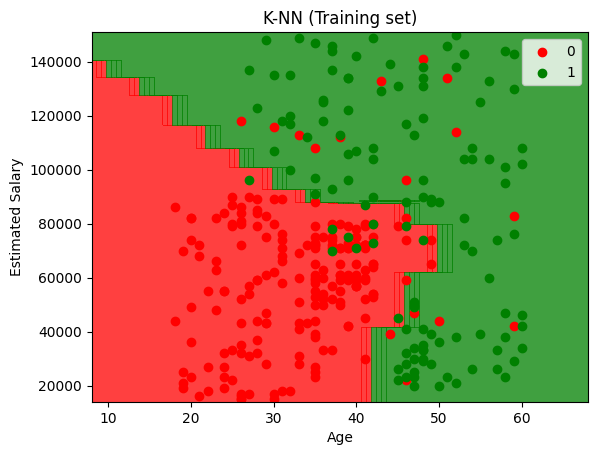

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 4),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 4))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_16944\1899752597.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


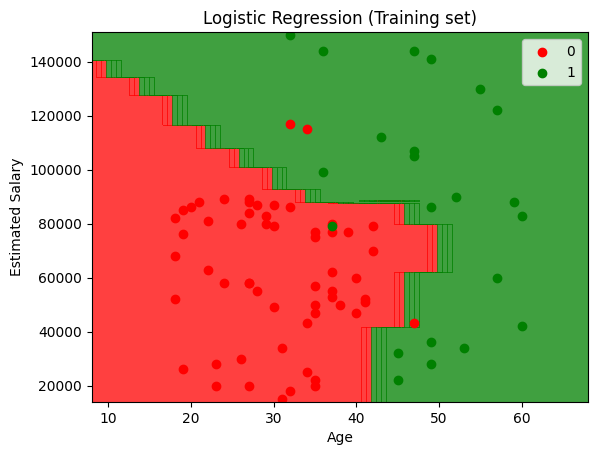

In [12]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 4),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 4))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()